In [79]:
# Dimensionality Reduction using Restricted Boltzmann Machines

import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.model_selection import GridSearchCV

In [57]:
mnist_data_train = pd.read_csv('datasets/mnist_train.csv')
mnist_data_train = pd.read_csv('datasets/mnist_test.csv')
frames = [mnist_data_train, mnist_data_train]
mnist_data = pd.concat(frames)

In [59]:
mnist_data.sample(5)

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
3696,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5206,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9659,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4696,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5215,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
mnist_data.shape

(19998, 785)

In [61]:
mnist_features = mnist_data[mnist_data.columns[1:]]
mnist_labels = mnist_data[mnist_data.columns[0]]

In [62]:
mnist_features.shape

(19998, 784)

In [63]:
def display_images(index):
    print('label:', mnist_labels[index])
    plt.imshow(mnist_features.iloc[index].values.reshape(28,28), cmap='Greys')

label: 2    0
2    0
Name: 7, dtype: int64


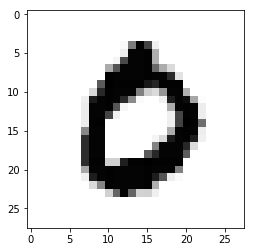

In [64]:
display_images(2)

In [65]:
mnist_features = np.array(mnist_features)

In [66]:
# they are grayscale images 0-255
mnist_features[2][100:140]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 150,
       253, 202,  31,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0])

In [67]:
# to have all the values between 0 and 1
mnist_features = mnist_features / 255.

In [68]:
mnist_features[10][100:150]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02745098, 0.58823529, 0.98823529, 0.98823529,
       0.49019608, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.45882353])

In [69]:
X_train, X_test, y_train, y_test = train_test_split(mnist_features, 
                                                    mnist_labels, 
                                                    shuffle=True,
                                                    test_size=0.2)

In [70]:
X_train.shape, y_train.shape

((15998, 784), (15998,))

In [71]:
X_test.shape, y_test.shape

((4000, 784), (4000,))

In [76]:
logistic = LogisticRegression(solver='lbfgs',
                              max_iter=1000,
                              multi_class='multinomial')

In [82]:
# to avoid overfitting
# C is inverse of regularization -- smaller values imply stronger regularization
param_grid = [{'C' : [0.1,1,5]}]

grid_search = GridSearchCV(logistic, param_grid, cv=2)
grid_search.fit(X_train, y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

0.937179647455932
{'C': 5}


In [94]:
# now we want to use dimensiality reduction

# it's got only 2 layers (shallow NN)
# it uses unsupervised learning to reduce the dimension of inputs
rbm = BernoulliRBM(verbose=True)

rbm_features_classifier = Pipeline( steps = [
                                    ('rbm', rbm),
                                    ('logistic', logistic)]
                                  )

rbm.learning_rate = 0.06
logistic.C = grid_search.best_params_['C']

In [96]:
rbm_features_classifier.get_params().keys()

dict_keys(['memory', 'steps', 'rbm', 'logistic', 'rbm__batch_size', 'rbm__learning_rate', 'rbm__n_components', 'rbm__n_iter', 'rbm__random_state', 'rbm__verbose', 'logistic__C', 'logistic__class_weight', 'logistic__dual', 'logistic__fit_intercept', 'logistic__intercept_scaling', 'logistic__max_iter', 'logistic__multi_class', 'logistic__n_jobs', 'logistic__penalty', 'logistic__random_state', 'logistic__solver', 'logistic__tol', 'logistic__verbose', 'logistic__warm_start'])

In [101]:
# to find out the best hyperparameters 

param_grid = [ 
               {'rbm__n_components': [5, 50, 100, 150],
                'rbm__n_iter': [5, 20]
               }
             ]

grid_search = GridSearchCV(rbm_features_classifier, param_grid, cv=2)
grid_search.fit(X_train, y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

# the following process is called maximum likelihood estimation

[BernoulliRBM] Iteration 1, pseudo-likelihood = -204.45, time = 0.26s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -201.68, time = 0.36s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -192.80, time = 0.31s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -187.06, time = 0.30s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -200.73, time = 0.29s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -197.24, time = 0.26s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -206.49, time = 0.31s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -207.75, time = 0.37s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -192.07, time = 0.30s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -207.71, time = 0.33s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -204.50, time = 0.27s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -199.15, time = 0.30s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -196.68, time = 0.30s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -197.11, time = 0.31s
[BernoulliRBM] Itera

[BernoulliRBM] Iteration 8, pseudo-likelihood = -94.54, time = 0.92s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -95.69, time = 0.91s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -95.52, time = 0.91s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -99.78, time = 0.89s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -87.34, time = 0.89s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -95.81, time = 0.90s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -92.46, time = 0.89s
[BernoulliRBM] Iteration 15, pseudo-likelihood = -92.65, time = 0.88s
[BernoulliRBM] Iteration 16, pseudo-likelihood = -95.76, time = 0.88s
[BernoulliRBM] Iteration 17, pseudo-likelihood = -91.55, time = 0.89s
[BernoulliRBM] Iteration 18, pseudo-likelihood = -94.98, time = 0.88s
[BernoulliRBM] Iteration 19, pseudo-likelihood = -91.37, time = 0.95s
[BernoulliRBM] Iteration 20, pseudo-likelihood = -89.67, time = 0.89s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -193.47, time = 0.78s
[BernoulliRBM] Iterati

/Users/alisharifara/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
